In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# smote - niezbilansowane

In [14]:
X = load_digits()['data']
y = load_digits()['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [9]:
#zakres neuronów 100-200
nn = np.arange(100, 201, 10)

In [21]:
scores = []
for n in nn:
    model = MLPClassifier(hidden_layer_sizes=n, random_state=123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [39]:
scores = []
for n in nn:
    model = MLPClassifier(hidden_layer_sizes=n, random_state=123)
    score = np.mean(cross_val_score(model, X, y, cv=5))
    scores.append(score)

In [23]:
res = pd.DataFrame({
    "layres": nn,
    'accuracy_score':scores
})

In [40]:
pos = np.argmax(scores)

In [41]:
nn[pos]

190

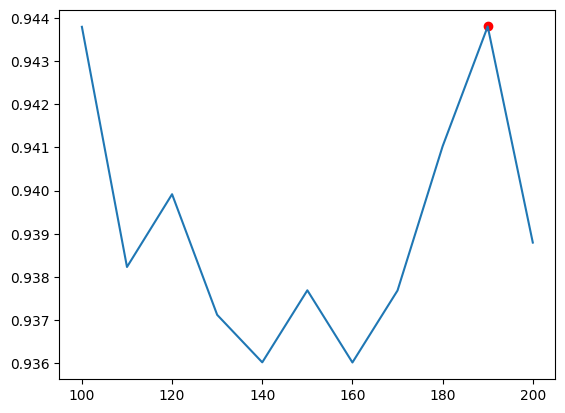

In [42]:
plt.scatter(nn[pos], scores[pos], c='r')
plt.plot(nn, scores)
plt.show()

In [ ]:
# data augmentation

### keras version

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [2]:
from keras import layers, models

# Build a simple CNN model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

#czy tutaj jest cv, jak nie ma to dodac




Epoch 1/5


750/750 [==============================] - 12s 14ms/step - loss: 0.2218 - accuracy: 0.9326 - val_loss: 0.0675 - val_accuracy: 0.9808
Epoch 2/5
750/750 [==============================] - 11s 14ms/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0629 - val_accuracy: 0.9822
Epoch 3/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0463 - val_accuracy: 0.9877
Epoch 4/5
750/750 [==============================] - 10s 14ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0475 - val_accuracy: 0.9874
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0392 - accuracy: 0.9884
Test accuracy: 0.9883999824523926


In [1]:
import numpy as np
from sklearn.model_selection import KFold
from keras import layers, models
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Function to create the model
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model in a scikit-learn estimator
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=64, verbose=0)

# Use KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
results = cross_val_score(model, train_images, train_labels, cv=kf)
print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (results.mean() * 100, results.std() * 100))


C:\Users\wpiel\AppData\Local\Temp\ipykernel_19324\3173074736.py:36: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=64, verbose=0)







Cross-Validation Accuracy: 98.75% (+/- 0.12%)


In [1]:
import numpy as np
from sklearn.model_selection import KFold
from keras import layers, models
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X = train_images
y = train_labels
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train, epochs=5, batch_size=64)

    test_loss, test_acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', test_acc)





TRAIN: [12000 12001 12002 ... 59997 59998 59999] TEST: [    0     1     2 ... 11997 11998 11999]
Epoch 1/5


750/750 [==============================] - 11s 13ms/step - loss: 0.1969 - accuracy: 0.9408
Epoch 2/5
750/750 [==============================] - 9s 13ms/step - loss: 0.0524 - accuracy: 0.9832
Epoch 3/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0381 - accuracy: 0.9877
Epoch 4/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0281 - accuracy: 0.9912
Epoch 5/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0445 - accuracy: 0.9883
Test accuracy: 0.9883333444595337
TRAIN: [    0     1     2 ... 59997 59998 59999] TEST: [12000 12001 12002 ... 23997 23998 23999]
Epoch 1/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0250 - accuracy: 0.9928
Epoch 2/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 3/5
750/750 [==============================] - 10s 13ms/st